### k-NN Algorithm

k-NN algorithm is a non-parametric algorithm that exploits the
geometry / vector space of data points (D- dimensions and N- data
                                        points).

"Training" $k$-NN methods is somewhat different from training
e.g. regression models, as the results are not concentrated into
certain parameters.  A "trained" $k$-NN is just the training data.
This is called _instance-based learning_.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris
iris_data = load_iris()

In [3]:
print(iris_data.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [4]:
df_iris_data = pd.DataFrame(iris_data.data, columns = iris_data.feature_names)
df_iris_target = pd.DataFrame(iris_data.target, columns=['target'])
print(df_iris_target)

     target
0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
..      ...
120       2
121       2
122       2
123       2
124       2
125       2
126       2
127       2
128       2
129       2
130       2
131       2
132       2
133       2
134       2
135       2
136       2
137       2
138       2
139       2
140       2
141       2
142       2
143       2
144       2
145       2
146       2
147       2
148       2
149       2

[150 rows x 1 columns]


In [5]:
df_iris_data.shape
df_iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
X = iris_data.data[:,:2]
print("looking at variables:", iris_data.feature_names[:2])
y = iris_data.target

looking at variables: ['sepal length (cm)', 'sepal width (cm)']


In [7]:
n = 5
p = 1

In [8]:
from sklearn.neighbors import KNeighborsClassifier
iris_clf = KNeighborsClassifier(n_neighbors=n,p=p)
iris_clf.fit(X, y)

# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

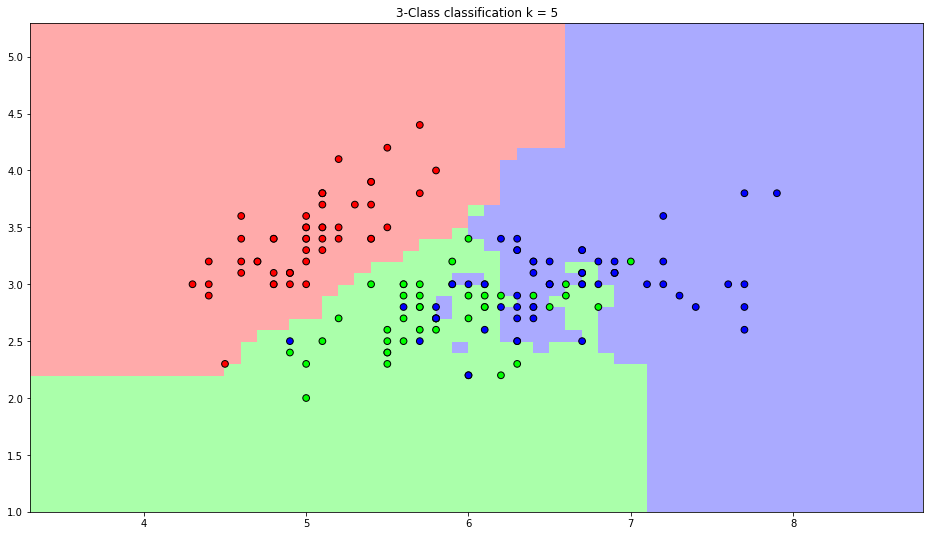

In [9]:
from matplotlib.colors import ListedColormap

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


Z = iris_clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(16,9))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=45)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification k = %i"
          % (n))
plt.show()

In [10]:
#Accuracy:
from sklearn.metrics import accuracy_score
iris_preds = iris_clf.predict(X)
accuracy_score(iris_preds,iris_data.target)

0.8333333333333334

looking at variables: ['petal length (cm)', 'petal width (cm)']


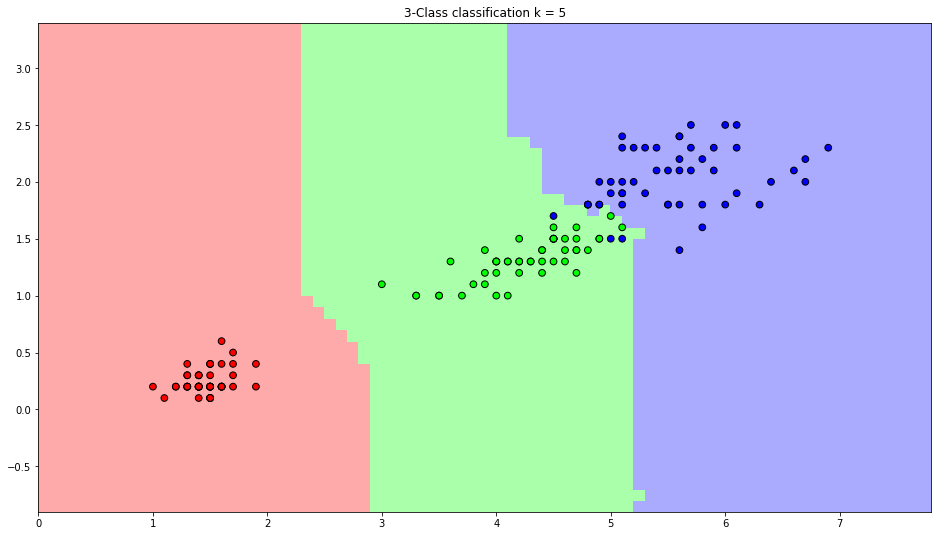

0.96

In [11]:
#Other two variables:
X = iris_data.data[:,2:4]
print("looking at variables:", iris_data.feature_names[2:4])
y = iris_data.target

n = 5
p = 1

iris_clf1 = KNeighborsClassifier(n_neighbors=n,p=p)
iris_clf1.fit(X, y)

# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))



cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


Z = iris_clf1.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(16,9))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=45)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification k = %i"
          % (n))
plt.show()


#Accuracy:
from sklearn.metrics import accuracy_score
iris_preds = iris_clf1.predict(X)
accuracy_score(iris_preds,iris_data.target)

#### Working with Wine data

In [12]:
from sklearn.datasets import load_wine
wine_data = load_wine()


In [13]:
print(wine_data.DESCR)

Wine Data Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- 1) Alcohol
 		- 2) Malic acid
 		- 3) Ash
		- 4) Alcalinity of ash  
 		- 5) Magnesium
		- 6) Total phenols
 		- 7) Flavanoids
 		- 8) Nonflavanoid phenols
 		- 9) Proanthocyanins
		- 10)Color intensity
 		- 11)Hue
 		- 12)OD280/OD315 of diluted wines
 		- 13)Proline
        	- class:
                - class_0
                - class_1
                - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash: 

In [14]:
df_wine_data = pd.DataFrame(wine_data.data,columns=wine_data.feature_names)
print(df_wine_data.head())
print(wine_data.target[:10])
print(df_wine_data.shape)

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

#### Scaling 

Interesting article on medium: [Link](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e)

Observe the Y-axis before scaling

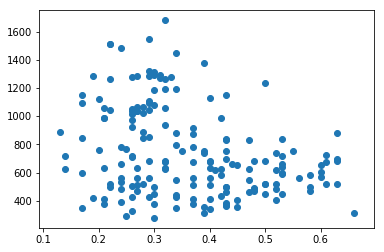

In [15]:
plt.scatter(df_wine_data.nonflavanoid_phenols,df_wine_data.proline)

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df_wine_data)
scaled_wine_data = pd.DataFrame(scaler.transform(df_wine_data),columns=wine_data.feature_names)

After scaling

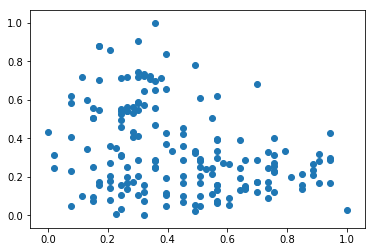

In [17]:
plt.scatter(scaled_wine_data.nonflavanoid_phenols,scaled_wine_data.proline)

#### Distance metrics

sklearn module [Link](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html)

In [18]:
n = 5



[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


Text(0.5,1,'3-Class classification k = 5')

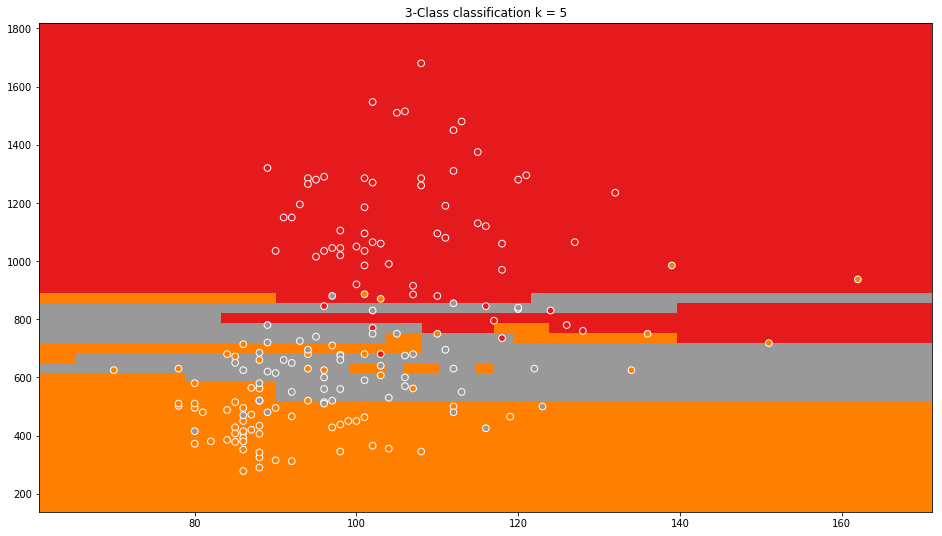

In [19]:
X = df_wine_data[['magnesium', 'proline']].as_matrix()
y = wine_data.target
print(y)
#V = np.cov(X.T)
#print(V)
winecl = KNeighborsClassifier(n_neighbors=n, p=2)
winecl.fit(X, y)
# Plotting decision regions
dx = X[:, 0].max() - X[:, 0].min()
dy = X[:, 1].max() - X[:, 1].min()
x_min, x_max = X[:, 0].min() - 0.1*dx, X[:, 0].max() + 0.1*dx
y_min, y_max = X[:, 1].min() - 0.1*dy, X[:, 1].max() + 0.1*dy
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50),
                     np.linspace(y_min, y_max, 50))
gridX = np.c_[xx.ravel(), yy.ravel()]
Z = winecl.predict(gridX)
Z = Z.reshape(xx.shape)
plt.figure(figsize=(16,9))
plt.pcolormesh(xx, yy, Z, cmap=plt.get_cmap('Set1'))

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.get_cmap('Set1'),
            edgecolor='w', s=45)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification k = %i"
          % (n))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


0.7696629213483146

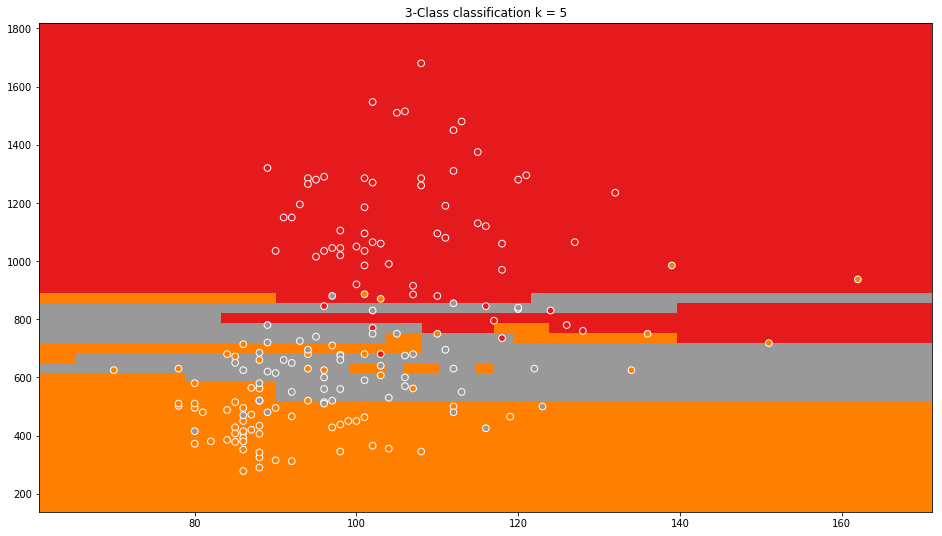

In [20]:
#Not scaled-euclidean
X = df_wine_data[['magnesium', 'proline']].as_matrix()
y = wine_data.target
print(y)
#V = np.cov(X.T)
#print(V)
winecl1 = KNeighborsClassifier(n_neighbors=n, p=2,  metric='euclidean')#, metric_params =
                              #{'V': V})
winecl1.fit(X, y)
# Plotting decision regions
dx = X[:, 0].max() - X[:, 0].min()
dy = X[:, 1].max() - X[:, 1].min()
x_min, x_max = X[:, 0].min() - 0.1*dx, X[:, 0].max() + 0.1*dx
y_min, y_max = X[:, 1].min() - 0.1*dy, X[:, 1].max() + 0.1*dy
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50),
                     np.linspace(y_min, y_max, 50))
gridX = np.c_[xx.ravel(), yy.ravel()]
Z = winecl1.predict(gridX)
Z = Z.reshape(xx.shape)
plt.figure(figsize=(16,9))
plt.pcolormesh(xx, yy, Z, cmap=plt.get_cmap('Set1'))

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.get_cmap('Set1'),
            edgecolor='w', s=45)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification k = %i"
          % (n))


#Accuracy:
wine_preds1 = winecl1.predict(X)
accuracy_score(wine_preds1,wine_data.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


0.7921348314606742

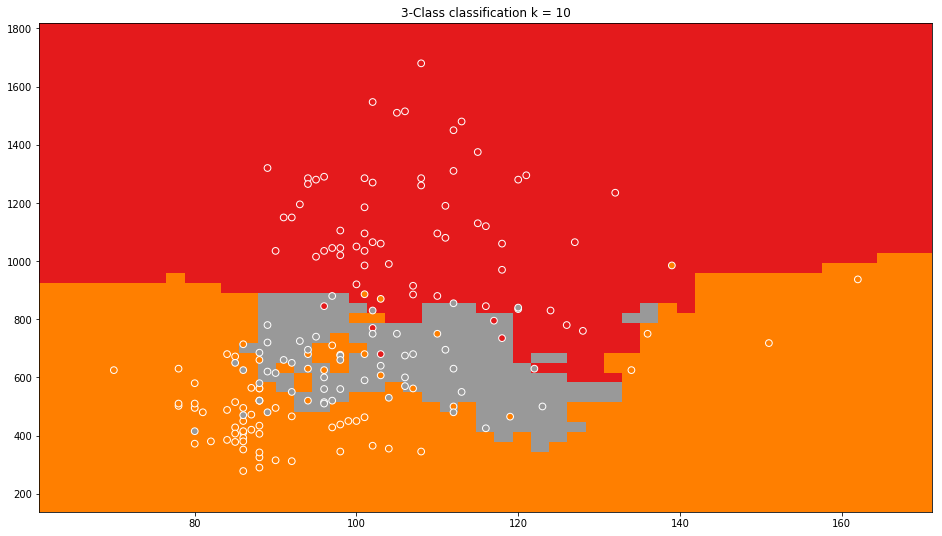

In [28]:
#Not scaled-mahalanobis
n=10
X5 = df_wine_data[['magnesium', 'proline']].as_matrix()
y5 = wine_data.target
print(y)
V = np.cov(X5.T)
#print(V)
winecl5 = KNeighborsClassifier(n_neighbors=n, p=2,  metric='mahalanobis', metric_params =
                              {'V': V})
winecl5.fit(X5, y5)
# Plotting decision regions
dx = X5[:, 0].max() - X5[:, 0].min()
dy = X5[:, 1].max() - X5[:, 1].min()
x_min, x_max = X5[:, 0].min() - 0.1*dx, X5[:, 0].max() + 0.1*dx
y_min, y_max = X5[:, 1].min() - 0.1*dy, X5[:, 1].max() + 0.1*dy
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50),
                     np.linspace(y_min, y_max, 50))
gridX5 = np.c_[xx.ravel(), yy.ravel()]
Z5 = winecl5.predict(gridX5)
Z5 = Z5.reshape(xx.shape)
plt.figure(figsize=(16,9))
plt.pcolormesh(xx, yy, Z5, cmap=plt.get_cmap('Set1'))

# Plot also the training points
plt.scatter(X5[:, 0], X5[:, 1], c=y5, cmap=plt.get_cmap('Set1'),
            edgecolor='w', s=45)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification k = %i"
          % (n))


#Accuracy:
wine_preds5 = winecl5.predict(X5)
accuracy_score(wine_preds5,wine_data.target)

0.7865168539325843

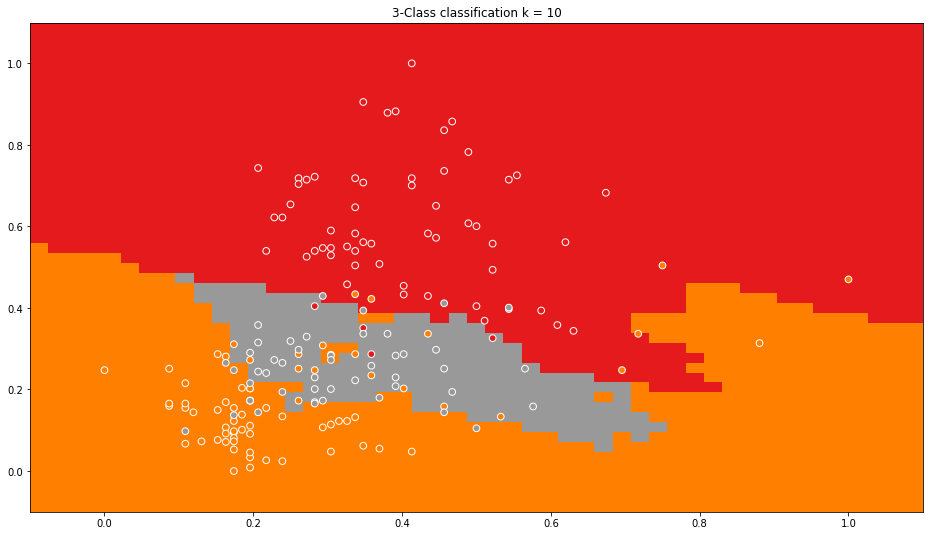

In [24]:
X = scaled_wine_data[['magnesium', 'proline']].as_matrix()
y = wine_data.target

#V = np.cov(X.T)
#print(V)
winecl = KNeighborsClassifier(n_neighbors=n, p=2)
winecl.fit(X, y)
# Plotting decision regions
dx = X[:, 0].max() - X[:, 0].min()
dy = X[:, 1].max() - X[:, 1].min()
x_min, x_max = X[:, 0].min() - 0.1*dx, X[:, 0].max() + 0.1*dx
y_min, y_max = X[:, 1].min() - 0.1*dy, X[:, 1].max() + 0.1*dy
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50),
                     np.linspace(y_min, y_max, 50))
gridX = np.c_[xx.ravel(), yy.ravel()]
Z = winecl.predict(gridX)
Z = Z.reshape(xx.shape)
plt.figure(figsize=(16,9))
plt.pcolormesh(xx, yy, Z, cmap=plt.get_cmap('Set1'))

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.get_cmap('Set1'),
            edgecolor='w', s=45)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification k = %i"
          % (n))

wine_preds = winecl.predict(X)
accuracy_score(wine_preds,wine_data.target)

[[0.02410082 0.01371611]
 [0.01371611 0.05045102]]


0.8258426966292135

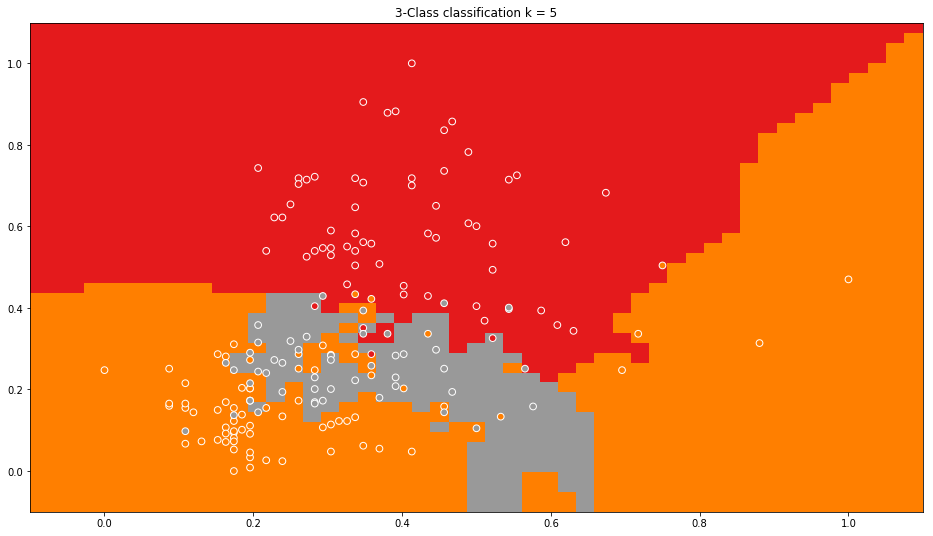

In [25]:
# Scaled -mahalanobis,n=5
n=5
X = scaled_wine_data[['magnesium', 'proline']].as_matrix()
y = wine_data.target

V = np.cov(X.T)
print(V)
winecl2 = KNeighborsClassifier(n_neighbors=n, p=2,metric='mahalanobis', metric_params =
                              {'V': V})
winecl2.fit(X, y)
# Plotting decision regions
dx = X[:, 0].max() - X[:, 0].min()
dy = X[:, 1].max() - X[:, 1].min()
x_min, x_max = X[:, 0].min() - 0.1*dx, X[:, 0].max() + 0.1*dx
y_min, y_max = X[:, 1].min() - 0.1*dy, X[:, 1].max() + 0.1*dy
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50),
                     np.linspace(y_min, y_max, 50))
gridX = np.c_[xx.ravel(), yy.ravel()]
Z = winecl2.predict(gridX)
Z = Z.reshape(xx.shape)
plt.figure(figsize=(16,9))
plt.pcolormesh(xx, yy, Z, cmap=plt.get_cmap('Set1'))

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.get_cmap('Set1'),
            edgecolor='w', s=45)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification k = %i"
          % (n))

wine_preds2 = winecl2.predict(X)
accuracy_score(wine_preds2,wine_data.target)

In [ ]:
# Scaled -mahalanobis,n=10
n=10
X = scaled_wine_data[['magnesium', 'proline']].as_matrix()
y = wine_data.target

V = np.cov(X.T)
print(V)
winecl3 = KNeighborsClassifier(n_neighbors=n, p=2,metric='mahalanobis', metric_params =
                              {'V': V})
print(n)
winecl3.fit(X, y)
# Plotting decision regions
dx = X[:, 0].max() - X[:, 0].min()
dy = X[:, 1].max() - X[:, 1].min()
x_min, x_max = X[:, 0].min() - 0.1*dx, X[:, 0].max() + 0.1*dx
y_min, y_max = X[:, 1].min() - 0.1*dy, X[:, 1].max() + 0.1*dy
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50),
                     np.linspace(y_min, y_max, 50))
gridX = np.c_[xx.ravel(), yy.ravel()]
Z = winecl3.predict(gridX)
Z = Z.reshape(xx.shape)
plt.figure(figsize=(16,9))
plt.pcolormesh(xx, yy, Z, cmap=plt.get_cmap('Set1'))

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.get_cmap('Set1'),
            edgecolor='w', s=45)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification k = %i"
          % (n))

wine_preds3 = winecl3.predict(X)
accuracy_score(wine_preds3,wine_data.target)

0.8033707865168539

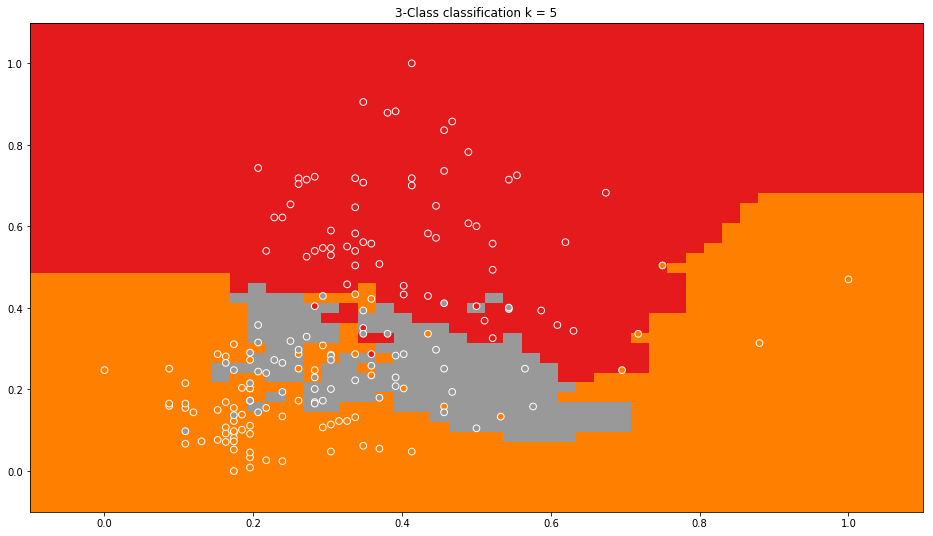

In [27]:
# Scaled -manhattan,n=5
n=5
X = scaled_wine_data[['magnesium', 'proline']].as_matrix()
y = wine_data.target

#V = np.cov(X.T)
#print(V)
winecl = KNeighborsClassifier(n_neighbors=n, p=2,metric='manhattan')
winecl.fit(X, y)
# Plotting decision regions
dx = X[:, 0].max() - X[:, 0].min()
dy = X[:, 1].max() - X[:, 1].min()
x_min, x_max = X[:, 0].min() - 0.1*dx, X[:, 0].max() + 0.1*dx
y_min, y_max = X[:, 1].min() - 0.1*dy, X[:, 1].max() + 0.1*dy
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50),
                     np.linspace(y_min, y_max, 50))
gridX = np.c_[xx.ravel(), yy.ravel()]
Z = winecl.predict(gridX)
Z = Z.reshape(xx.shape)
plt.figure(figsize=(16,9))
plt.pcolormesh(xx, yy, Z, cmap=plt.get_cmap('Set1'))

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.get_cmap('Set1'),
            edgecolor='w', s=45)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification k = %i"
          % (n))

wine_preds = winecl.predict(X)
accuracy_score(wine_preds,wine_data.target)

0.9887640449438202

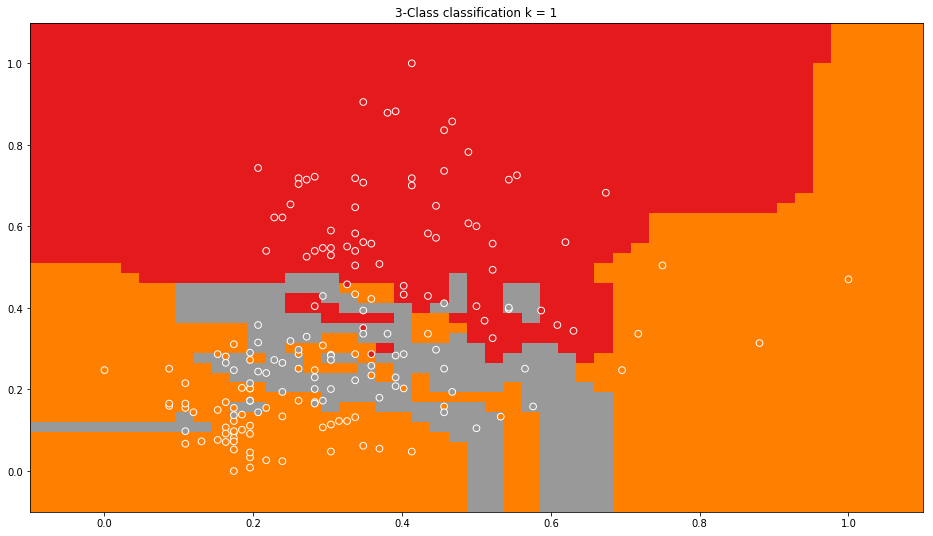

In [29]:
# Scaled -manhattan,n=1
n=1
X = scaled_wine_data[['magnesium', 'proline']].as_matrix()
y = wine_data.target

#V = np.cov(X.T)
#print(V)
winecl = KNeighborsClassifier(n_neighbors=n, p=2,metric='manhattan')
winecl.fit(X, y)
# Plotting decision regions
dx = X[:, 0].max() - X[:, 0].min()
dy = X[:, 1].max() - X[:, 1].min()
x_min, x_max = X[:, 0].min() - 0.1*dx, X[:, 0].max() + 0.1*dx
y_min, y_max = X[:, 1].min() - 0.1*dy, X[:, 1].max() + 0.1*dy
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50),
                     np.linspace(y_min, y_max, 50))
gridX = np.c_[xx.ravel(), yy.ravel()]
Z = winecl.predict(gridX)
Z = Z.reshape(xx.shape)
plt.figure(figsize=(16,9))
plt.pcolormesh(xx, yy, Z, cmap=plt.get_cmap('Set1'))

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.get_cmap('Set1'),
            edgecolor='w', s=45)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification k = %i"
          % (n))

wine_preds = winecl.predict(X)
accuracy_score(wine_preds,wine_data.target)

0.7865168539325843

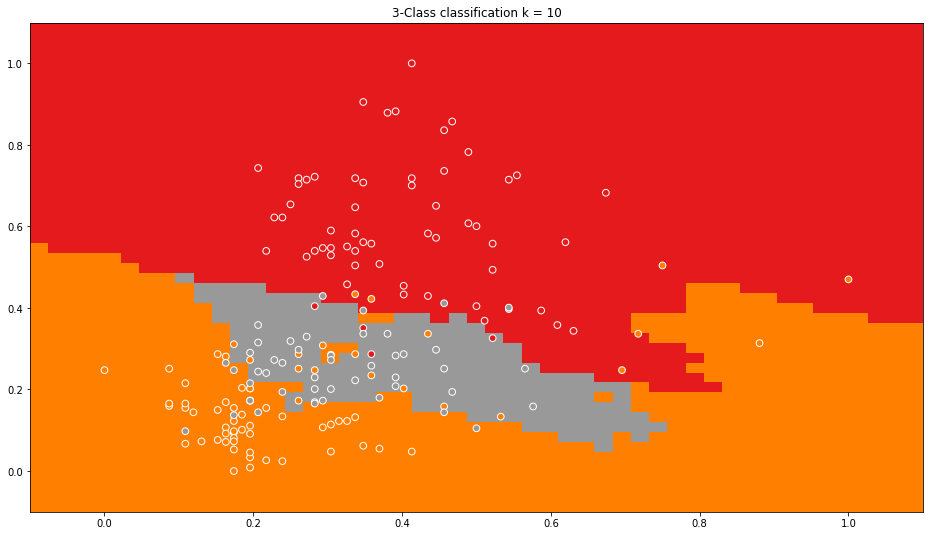

In [37]:
# Scaled -euclidean,n=10
n=10
X = scaled_wine_data[['magnesium', 'proline']].as_matrix()
y = wine_data.target

#V = np.cov(X.T)
#print(V)
winecl = KNeighborsClassifier(n_neighbors=n, p=2, metric='euclidean')
winecl.fit(X, y)
# Plotting decision regions
dx = X[:, 0].max() - X[:, 0].min()
dy = X[:, 1].max() - X[:, 1].min()
x_min, x_max = X[:, 0].min() - 0.1*dx, X[:, 0].max() + 0.1*dx
y_min, y_max = X[:, 1].min() - 0.1*dy, X[:, 1].max() + 0.1*dy
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50),
                     np.linspace(y_min, y_max, 50))
gridX = np.c_[xx.ravel(), yy.ravel()]
Z = winecl.predict(gridX)
Z = Z.reshape(xx.shape)
plt.figure(figsize=(16,9))
plt.pcolormesh(xx, yy, Z, cmap=plt.get_cmap('Set1'))

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.get_cmap('Set1'),
            edgecolor='w', s=45)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification k = %i"
          % (n))

wine_preds = winecl.predict(X)
accuracy_score(wine_preds,wine_data.target)

[[ 1.54886339e-02 -1.22035863e+01]
 [-1.22035863e+01  9.91667174e+04]]


Text(0.5,1,'3-Class classification k = 5')

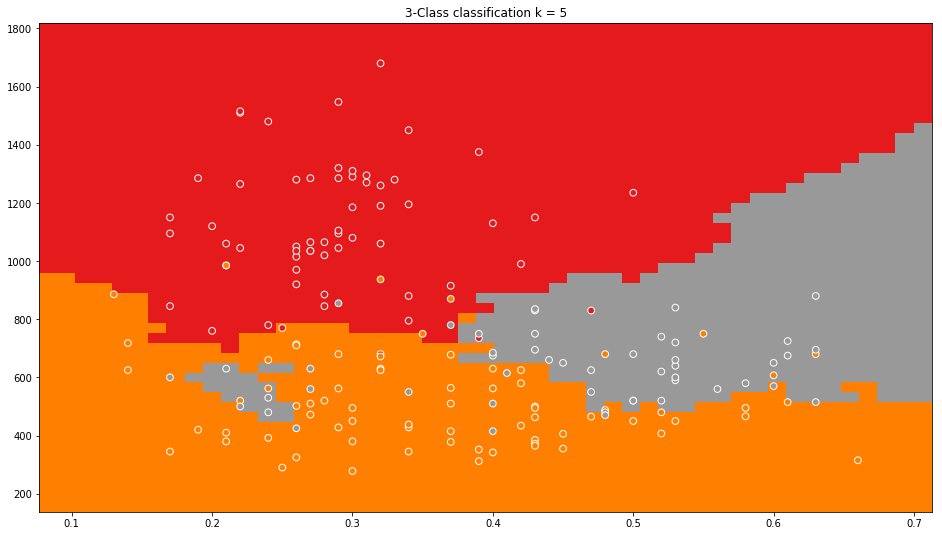

In [35]:
n = 5
X = df_wine_data[['nonflavanoid_phenols', 'proline']].as_matrix()
y = wine_data.target

V = np.cov(X.T)
print(V)
winecl = KNeighborsClassifier(n_neighbors=n, p=1,
                              metric='mahalanobis', metric_params =
                              {'V': V})
winecl.fit(X, y)
# Plotting decision regions
dx = X[:, 0].max() - X[:, 0].min()
dy = X[:, 1].max() - X[:, 1].min()
x_min, x_max = X[:, 0].min() - 0.1*dx, X[:, 0].max() + 0.1*dx
y_min, y_max = X[:, 1].min() - 0.1*dy, X[:, 1].max() + 0.1*dy
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50),
                     np.linspace(y_min, y_max, 50))
gridX = np.c_[xx.ravel(), yy.ravel()]
Z = winecl.predict(gridX)
Z = Z.reshape(xx.shape)
plt.figure(figsize=(16,9))
plt.pcolormesh(xx, yy, Z, cmap=plt.get_cmap('Set1'))

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.get_cmap('Set1'),
            edgecolor='w', s=45)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification k = %i"
          % (n))

In [ ]:
wine_preds = winecl.predict(X)
accuracy_score(wine_preds,wine_data.target)

#### Tune the parameters of distance metrics, number of neighbors and report results of your experiments in a dataframe

In [31]:
results = pd.DataFrame(columns =['dataset','is_scaled','distance_metrics','neighbours','accuracy'])


In [38]:
results.loc[1] = ['wine dataset:magnesium proline','No',' euclidean','5','0.7696629213483146']
results.loc[2] = ['wine dataset:magnesium proline','Yes',' mahalanobis','5','0.8258426966292135']
results.loc[3] = ['wine dataset:magnesium proline','Yes',' mahalanobis','10','0.7921348314606742']
results.loc[4] = ['wine dataset:magnesium proline','Yes',' manhattan','5','0.8033707865168539']
results.loc[5] = ['wine dataset:magnesium proline','No',' mahalanobis','10','0.7921348314606742']
results.loc[6] = ['wine dataset:magnesium proline','Yes',' manhattan','1','0.9887640449438202']
results.loc[7] = ['wine dataset:magnesium proline','Yes',' euclidean','10','0.7865168539325843']


In [39]:
results

,dataset,is_scaled,distance_metrics,neighbours,accuracy
1,wine dataset:magnesium proline,No,euclidean,5,0.7696629213483146
2,wine dataset:magnesium proline,Yes,mahalanobis,5,0.8258426966292135
3,wine dataset:magnesium proline,Yes,mahalanobis,10,0.7921348314606742
4,wine dataset:magnesium proline,Yes,manhattan,5,0.8033707865168539
5,wine dataset:magnesium proline,No,mahalanobis,10,0.7921348314606742
6,wine dataset:magnesium proline,Yes,manhattan,1,0.9887640449438202
7,wine dataset:magnesium proline,Yes,euclidean,10,0.7865168539325843
